In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def load_json(filename):
    import json
    with open(
        filename,
        "r",
    ) as fp:
        dict_i = json.load(fp)  
    return dict_i

In [3]:
def abbreviateValue(value, abbreviations={}):
    for k, v in abbreviations.items():
        if k in value:
            
            value = value.replace(k, v)
    #TODO
    if value[0:2] not in ["q_", "u_"]:
        value = value.replace("_", " ")
    return value
    
def abbreviate_dict_value(input_dict, abbreviations):
    
    conv ={}
    for k1, dict_i in input_dict.items():
        conv[k1] = { abbreviateValue(k, abbreviations): d for k, d in dict_i.items()}
    return conv

In [4]:
name_folder_output = "output_results"

In [5]:
compute_results = True

In [6]:
if compute_results:
    from experiments_compas_trees import run_compas_experiments_trees

    run_compas_experiments_trees(
        name_output_dir="results",
        type_criterion="entropy",
        min_support_tree=0.1,
        metric="d_fpr",
        ouput_folder_dir=name_folder_output,
    )

    run_compas_experiments_trees(
        name_output_dir="results",
        type_experiment="one_at_time",
        type_criterion="divergence_criterion",
        min_support_tree=0.1,
        metric="d_fpr",
        ouput_folder_dir=name_folder_output,
    )

/home/eliana/Projects/hierarchical-subgroup-exploration-private/TreeDivergence.py:776: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (data.dtypes[attr] == np.object) and (
/home/eliana/Projects/hierarchical-subgroup-exploration-private/TreeDivergence.py:776: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (data.dtypes[attr] == np.object) and (
/home/eliana/Projects/hierarchical-subgroup-exploration-private/TreeDivergence.py:776: DeprecationWarning: `np.object` is a depr

In [8]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_figures", "figures", "output_performance")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

# Read data

In [14]:
abbreviations = {"one_at_time":"indiv t.", \
                  "divergence_criterion":"g$\\Delta$", "entropy":"entr",\
                "without_gen": "base", "with_gen": "generalized"}

In [15]:
min_sup_tree = 0.1

metric= "d_fpr"

type_criterions = ["divergence_criterion", "entropy"]
type_gens = ["without_gen", "with_gen"]
dataset_name = "compas"
import os
output_results= os.path.join(os.path.curdir, name_folder_output, "results")

In [16]:
import os

info_tree = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["max", "FP"]:

    for type_criterion in type_criterions:
        if info_i not in info_tree[type_criterion]:
            info_tree[type_criterion][info_i] = {}
        filename = os.path.join(output_results,dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, f"info_ALL_{info_i}.json")

        stat = abbreviate_dict_value(load_json(filename), abbreviations)

        for gen_type in stat:
            info_tree[type_criterion][info_i][gen_type] =  {float(k):v for k,v in stat[gen_type].items()}    

# Plot max \Delta_FPR

In [17]:
color_labels = {}
color_labels[abbreviateValue(f'entropy_{abbreviations["without_gen"]}', abbreviations)]="#7fcc7f"
color_labels[abbreviateValue(f'divergence_criterion_{abbreviations["without_gen"]}', abbreviations)]="#009900"

color_labels[abbreviateValue(f'entropy_{abbreviations["with_gen"]}', abbreviations)]="mediumblue"
color_labels[abbreviateValue(f'divergence_criterion_{abbreviations["with_gen"]}', abbreviations)]="orangered"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["divergence_criterion"] in k)})


## All

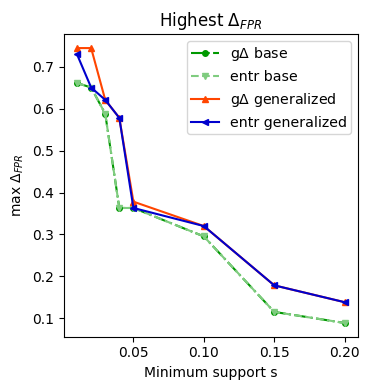

In [19]:
from utils_plot import plotDicts
info_i = "max"
type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts



info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all_n.pdf")


size_fig = (3.8,4)

plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Highest $\\Delta_{FPR}$", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="max $\\Delta_{FPR}$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

Only divergence

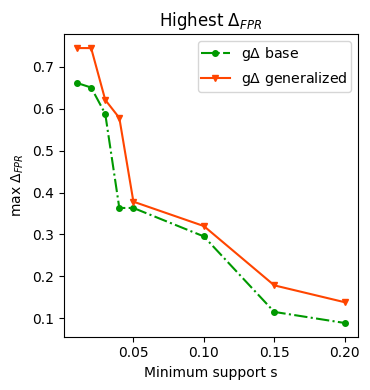

In [20]:
from utils_plot import plotDicts
info_i = "max"
type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts


info_plot = {}
for type_gen in type_gens:
    for type_criterion in ["divergence_criterion"]:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")

size_fig = (3.8,4)

plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Highest $\\Delta_{FPR}$", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="max $\\Delta_{FPR}$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

## Comparison entropy criterion

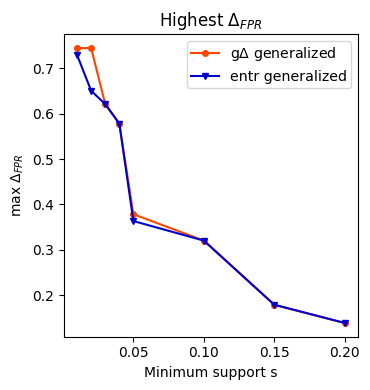

In [21]:
from utils_plot import plotDicts
info_i = "max"
type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts


info_plot = {}
for type_gen in ["with_gen"]:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")

size_fig = (3.8,4)

plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Highest $\\Delta_{FPR}$", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="max $\\Delta_{FPR}$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

#  Plot FP 

## All

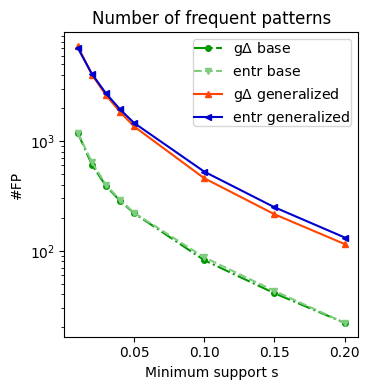

In [22]:
from utils_plot import plotDicts
info_i = "FP"


info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all_n.pdf")


size_fig = (3.8,4)

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

## Only divergence-based criterion

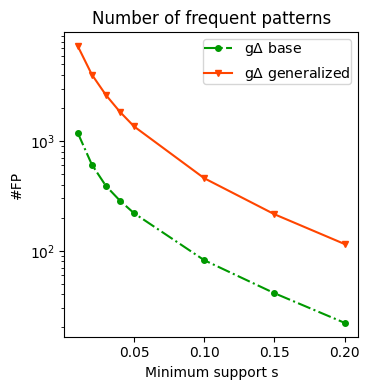

In [23]:
from utils_plot import plotDicts
info_i = "FP"


info_plot = {}
for type_gen in type_gens:
    for type_criterion in ["divergence_criterion"]:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

## Time

In [38]:
color_labels = {}
color_labels[abbreviateValue(f'{abbreviations["without_gen"]}', abbreviations)]="#009900"

color_labels[abbreviateValue(f'{abbreviations["with_gen"]}', abbreviations)]="orangered"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["divergence_criterion"] in k)})


In [39]:
import os

time_div = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["time"]:

    for type_criterion in type_criterions:
        if info_i not in info_tree[type_criterion]:
            info_tree[type_criterion][info_i] = {}
        filename = os.path.join(output_results,dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, f"info_{info_i}.json")

        stat = load_json(filename)

        for gen_type in type_gens:
            time_div[type_criterion][gen_type] =  {float(k):v for k,v in stat[gen_type].items()}    

{'base': {0.01: 0.3027200698852539, 0.02: 0.2751333713531494, 0.03: 0.2650032043457031, 0.04: 0.2707407474517822, 0.05: 0.2455594539642334, 0.1: 0.2280890941619873, 0.15: 0.20311594009399414, 0.2: 0.18931937217712402}, 'generalized': {0.01: 1.3435630798339844, 0.02: 0.9225614070892334, 0.03: 0.7787265777587891, 0.04: 0.6768107414245605, 0.05: 0.6027443408966064, 0.1: 0.3643779754638672, 0.15: 0.31764650344848633, 0.2: 0.28503870964050293}}


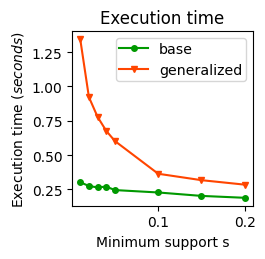

In [40]:
from utils_plot import plotDicts

type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts



info_plot = {}
for type_gen in type_gens:
        info_plot.update({abbreviateValue(f"{abbreviations[type_gen]}", abbreviations) \
            :  time_div[type_criterion][type_gen] })
print(info_plot)
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_time.pdf")


size_fig = (3.8,4)
size_fig = (2.7,2.7)

fig = plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Execution time", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,
          outside=False,  saveFig=False, nameFig = figure_name)

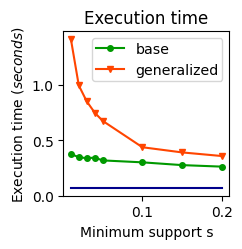

In [46]:
from utils_plot import MARKERS

import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100
size_fig = (2.6, 2.6)

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

tree_discr_time = stat["tree_time"]

info_plot2 = {k: {ki:vi+tree_discr_time for ki, vi in info_plot[k].items()} for k in info_plot }
m_i = 0
info_dicts = info_plot2
colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
markersize=4
linewidth = 1.5
for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    # label_name = (
    #     label if label != "artificial_10" else "artificial"
    # )  # For clarity reasons

    ax.plot(
        list(info_dict.keys()),
        list(info_dict.values()),
        label=label_name,
        marker=MARKERS[m_i],
        linewidth=linewidth,
        markersize=markersize,
        color=colors[e],
        linestyle=lines_style[label_name],
    )
    m_i = m_i + 1
plt.plot(list(info_dict.keys()), [tree_discr_time]*len(list(info_dict.keys())), c="darkblue")

import cycler
linestyle=lines_style
xlabel="Minimum support s"
ylabel="Execution time $(seconds)$"
labelSize=10.2
title="Execution time"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.ylim(bottom=0)
plt.legend(
        prop={"size": labelSize},
        fontsize=5,
        borderpad=0.25,
    )
saveFig = True
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_time.pdf")

if saveFig:
    fig.tight_layout()
    plt.savefig(figure_name, bbox_inches="tight")


In [42]:
import pandas as pd
print(tree_discr_time)
df_a = pd.DataFrame(time_div["divergence_criterion"])
df_a.columns = [f"{c}_div" for c in df_a.columns]
df_b = pd.DataFrame(time_div["entropy"])
df_b.columns = [f"{c}_entr" for c in df_a.columns]
pd.concat([df_a, df_b], axis = 1)

0.07322454452514648


,without_gen_div,with_gen_div,without_gen_div_entr,with_gen_div_entr
0.01,0.302720,1.343563,0.278656,1.103144
0.02,0.275133,0.922561,0.264832,0.655977
0.03,0.265003,0.778727,0.186563,0.549609
0.04,0.270741,0.676811,0.182433,0.470509
0.05,0.245559,0.602744,0.174678,0.420869
0.10,0.228089,0.364378,0.164397,0.271026
0.15,0.203116,0.317647,0.147121,0.236124
0.20,0.189319,0.285039,0.133687,0.199291
